Importing some libraries and tools

In [1]:
import torch
import torchvision
import torchvision.transforms as transf
import numpy as np
import torch.nn as nn
import torch.nn.functional as F


Transforms for the dataset, including the use of data augmentation for the training data

In [26]:
trans_train = transf.Compose([
    transf.RandomHorizontalFlip(),
    transf.RandomRotation(10),
    transf.ToTensor(),
    transf.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])
trans_test = transf.Compose([
    transf.ToTensor(),
    transf.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])

Obtaining the data required and loading it

In [27]:
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download= True, transform = trans_train)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download= True, transform = trans_test)
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size = 4, shuffle = True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size = 4, shuffle = False)


Files already downloaded and verified
Files already downloaded and verified


The classes used in the dataset

In [16]:
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

Implementing our CNN Class with more depth, batch normalisation and dropout

In [9]:
class convNet(nn.Module):
    def __init__(self):
        super(convNet,self).__init__()
        self.conv1=nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,stride=1,padding=1)
        self.conv2=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.conv3=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1)
        self.conv4=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1)
        self.conv5=nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1)
        self.b1=nn.BatchNorm2d(16)
        self.b2=nn.BatchNorm2d(64)
        self.b3=nn.BatchNorm2d(256)
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
        self.dropout=nn.Dropout(0.1)
        self.fc1=nn.Linear(256,128)
        self.fc2=nn.Linear(128,64)
        self.out=nn.Linear(64,10)


    def forward(self,x):
        x=self.pool(F.relu(self.b1(self.conv1(x))))
        x=self.pool(F.relu(self.conv2(x)))
        x=self.pool(F.relu(self.b2(self.conv3(x))))
        x=self.pool(F.relu(self.conv4(x)))
        x=self.pool(F.relu(self.b3(self.conv5(x))))
        x=x.view(-1,256)
        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=self.out(x)
        return x

Loss function and Optimiser

In [10]:
learnrate = 0.001
model = convNet()
loss_func = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(), lr = learnrate, momentum = 0.9)

Training the Model with repeated loops

In [11]:
epochs = 8
for epoch in range(epochs):

   runningloss = 0.0
   for i,batch in enumerate(train_dataloader, 0):

      inputs, labels = batch
      optimiser.zero_grad()

      outputs = model(inputs)
      loss = loss_func(outputs, labels)
      loss.backward()
      optimiser.step()
      runningloss += loss.item()
      if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {runningloss / 2000:.3f}')
            runningloss = 0.0

print('Training is done')


[1,  2000] loss: 1.963
[1,  4000] loss: 1.729
[1,  6000] loss: 1.626
[1,  8000] loss: 1.519
[1, 10000] loss: 1.489
[1, 12000] loss: 1.394
[2,  2000] loss: 1.335
[2,  4000] loss: 1.306
[2,  6000] loss: 1.285
[2,  8000] loss: 1.257
[2, 10000] loss: 1.228
[2, 12000] loss: 1.174
[3,  2000] loss: 1.147
[3,  4000] loss: 1.148
[3,  6000] loss: 1.117
[3,  8000] loss: 1.097
[3, 10000] loss: 1.098
[3, 12000] loss: 1.060
[4,  2000] loss: 1.034
[4,  4000] loss: 1.032
[4,  6000] loss: 1.035
[4,  8000] loss: 1.009
[4, 10000] loss: 1.007
[4, 12000] loss: 0.995
[5,  2000] loss: 0.965
[5,  4000] loss: 0.966
[5,  6000] loss: 0.959
[5,  8000] loss: 0.923
[5, 10000] loss: 0.954
[5, 12000] loss: 0.923
[6,  2000] loss: 0.891
[6,  4000] loss: 0.899
[6,  6000] loss: 0.906
[6,  8000] loss: 0.911
[6, 10000] loss: 0.890
[6, 12000] loss: 0.869
[7,  2000] loss: 0.852
[7,  4000] loss: 0.852
[7,  6000] loss: 0.862
[7,  8000] loss: 0.845
[7, 10000] loss: 0.850
[7, 12000] loss: 0.846
[8,  2000] loss: 0.806
[8,  4000] 

Evaluating the accuracy of the model

In [12]:
accurate = 0
total = 0

with torch.no_grad():
  for batch in test_dataloader:
    input, labels = batch
    outputs = model(input)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    accurate += (predicted == labels).sum().item()

print(f'Accuracy of the CNN on the 10000 test images is : {100 * accurate // total} %')

Accuracy of the CNN on the 10000 test images is : 71 %


Plotting a Confusion Matrix to visualise the accuracy of prediction for particular classes

<Axes: >

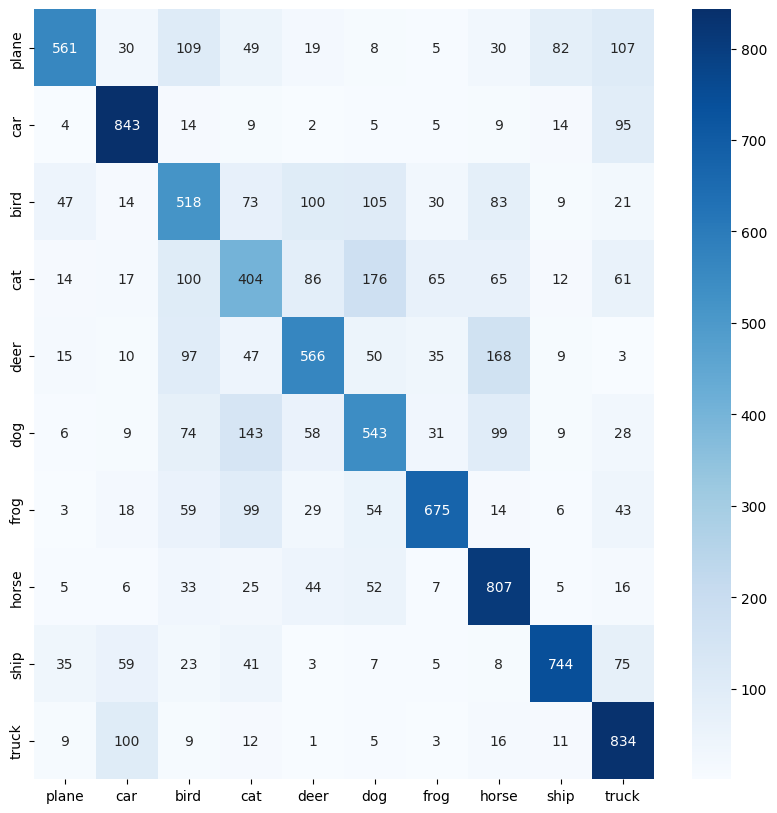

In [28]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def predictImage(img, model):

    x = img.unsqueeze(0)
    y = model(x)
    _, pred = torch.max(y, dim=1)

    return pred[0].item()

predict = np.empty((0, len(test_data)), np.int32)
actual = np.empty((0, len(test_data)), np.int32)

with torch.no_grad():
    for i in range(0, len(test_data)):
        testimage, testLabel = test_data[i]
        predictedValue = predictImage(testimage, model)

        predict = np.append(predict, predictedValue)
        actual = np.append(actual, testLabel)
confusionMatrix = confusion_matrix(actual, predict)

confusionMatrixDf = pd.DataFrame(confusionMatrix, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (10,10))
sns.heatmap(confusionMatrixDf, annot=True, cmap='Blues', fmt='g')